Importing Required libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Boosting
from sklearn.ensemble import RandomForestClassifier

# Simple Neural Network
from sklearn.neural_network import MLPClassifier

# SVM
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Dataset


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CSE437/heart.csv")

Exploratory Data Analysis

In [ ]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (1025, 14). This dataset contains 1025 rows and 14 columns.


In [ ]:

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:

categories = df['sex'].unique()
print(categories)


[1 0]


In [ ]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0



Feature Names and its Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Data Spliting

In [ ]:
# Define numerical and categorical features explicitly
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Selecting numerical features
numerical_data = df[numerical_features]

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 5 numerical features: 

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
# Selecting categorical features
categorical_data = df[categorical_features]

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 8 categorical features: 

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']



Descriptive Analysis

Summary statics of Numerical Featrues

In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Summary statics of Categorical Featrues

In [ ]:
# Transposed stats for categorical features

categorical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
slope,1025.0,1.385366,0.617755,0.0,1.0,1.0,2.0,2.0
ca,1025.0,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0
thal,1025.0,2.323902,0.620660,0.0,2.0,2.0,3.0,3.0


Variance of each numerical features

In [ ]:
numerical_data.var()

,0
age,82.306450
trestbps,306.835410
chol,2661.787109
thalach,529.263325
oldpeak,1.380750


Skew in numerical features


In [ ]:
numerical_data.skew()

,0
age,-0.248866
trestbps,0.739768
chol,1.074073
thalach,-0.513777
oldpeak,1.210899


Histograms and Box Plot

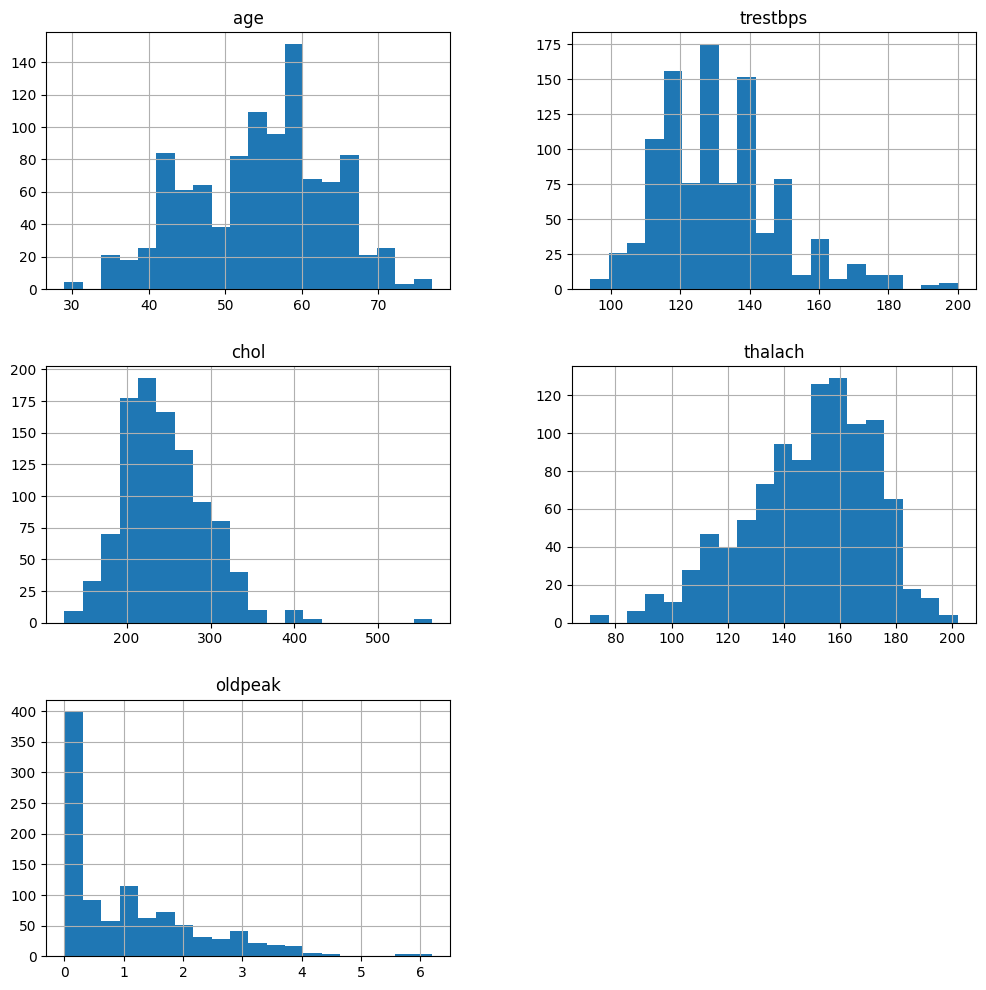

In [ ]:

numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

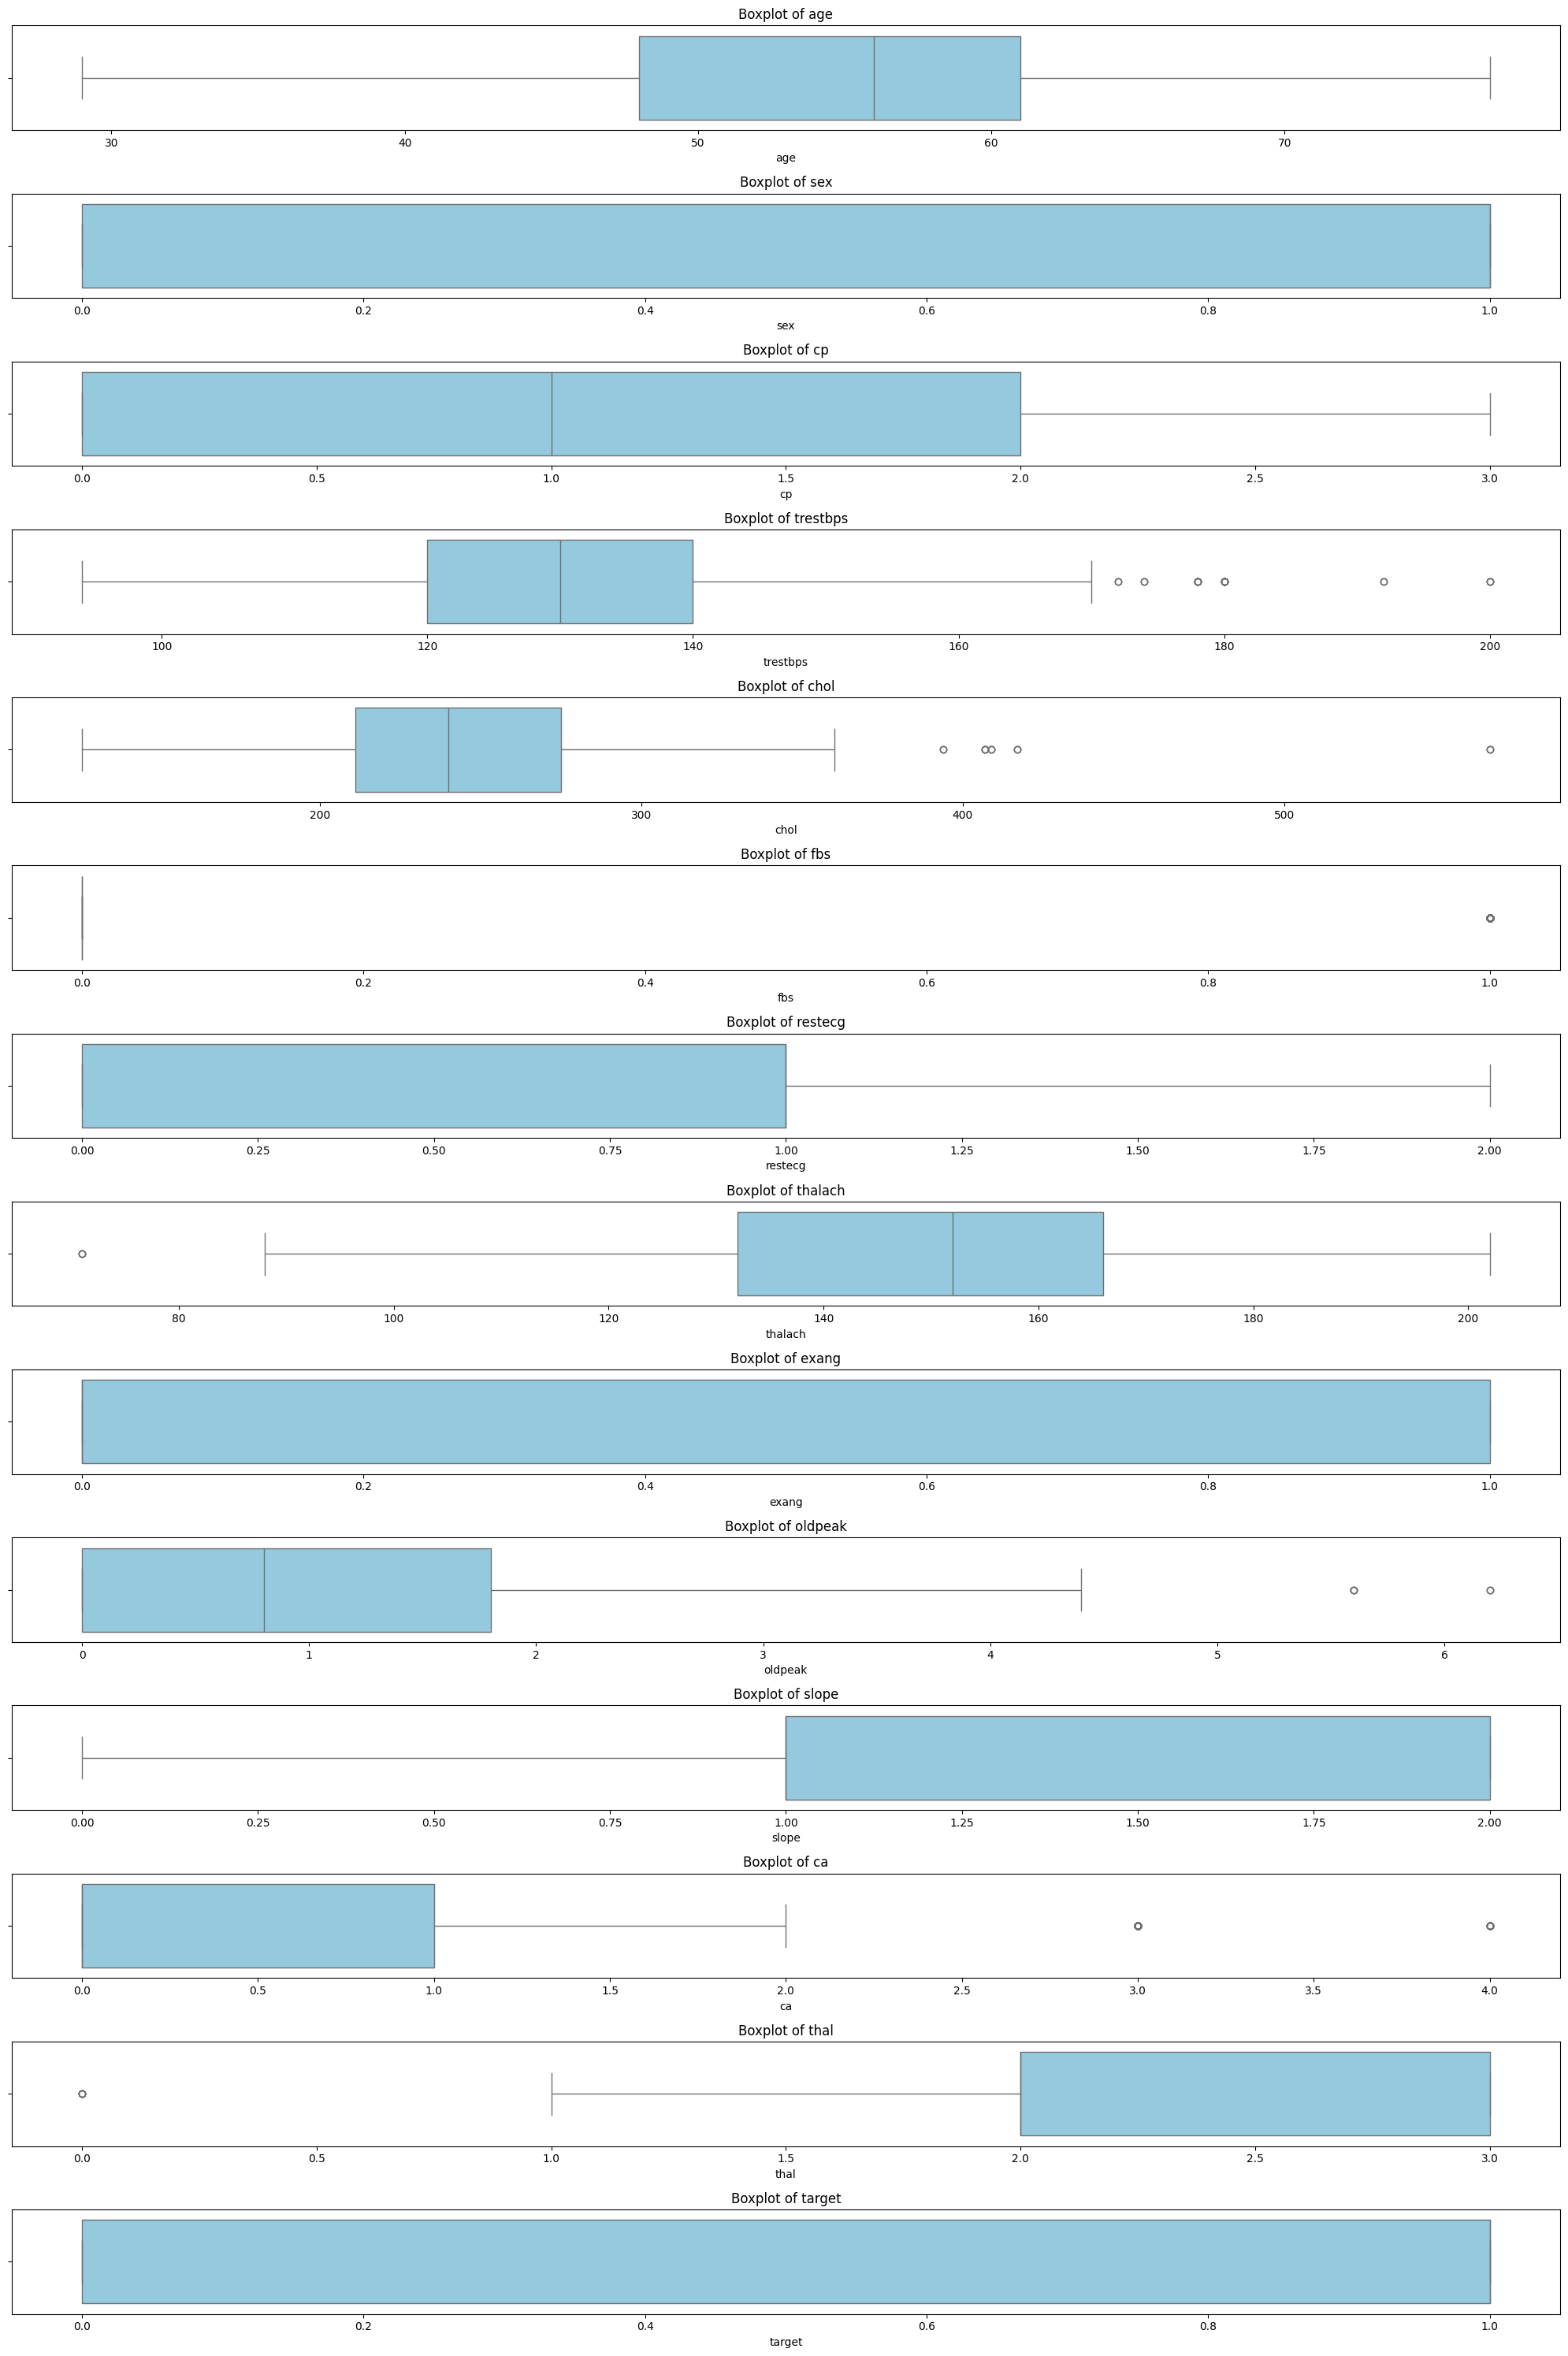

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for boxplot analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

Number Unique values in each feature

In [ ]:
numerical_data.nunique()

,0
age,41
trestbps,49
chol,152
thalach,91
oldpeak,40


Missing Values

In [ ]:
numerical_data.isnull().sum()

,0
age,0
trestbps,0
chol,0
thalach,0
oldpeak,0


Categorical Features

In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
dtype: int64


Barplot of unique value counts in every categorical features

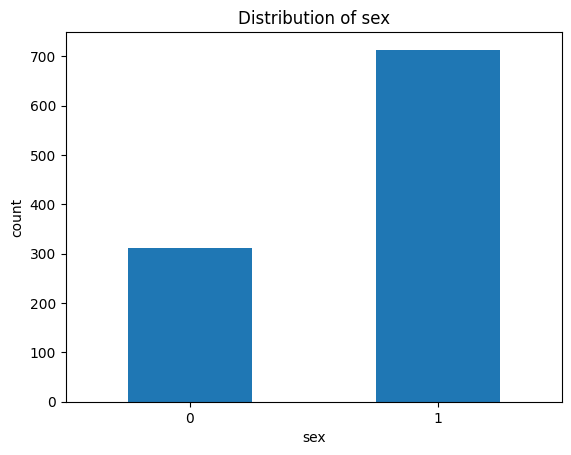

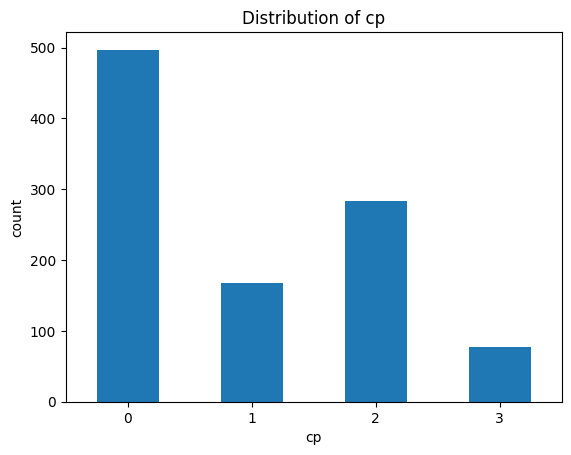

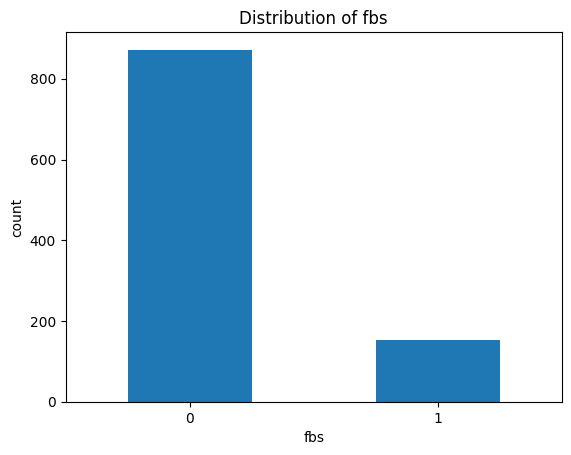

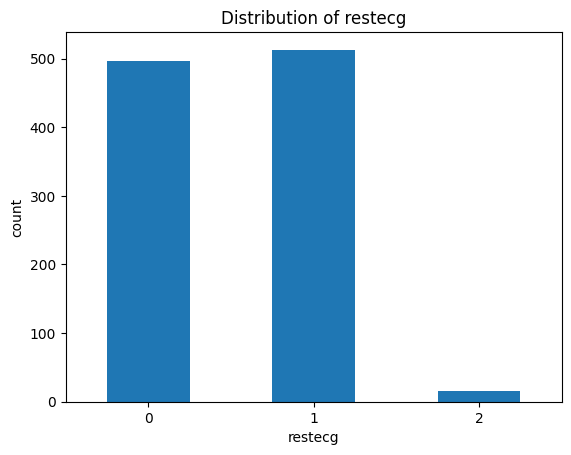

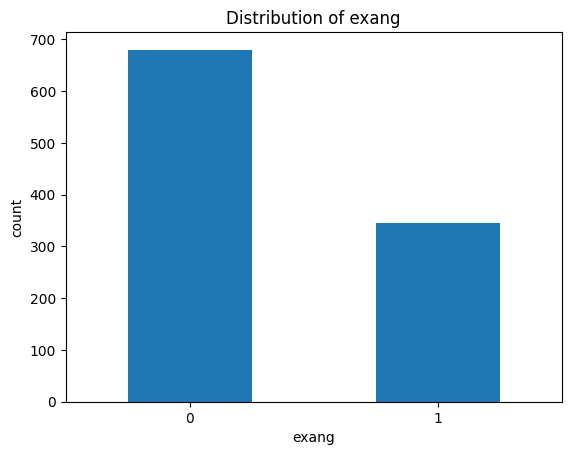

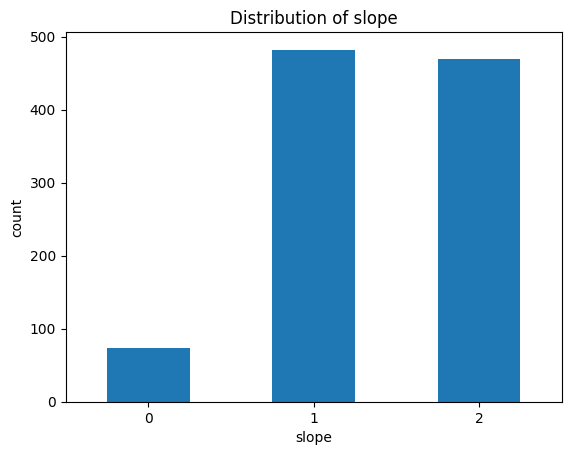

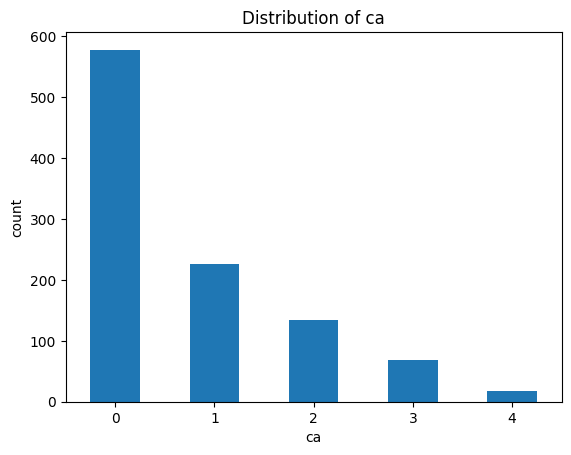

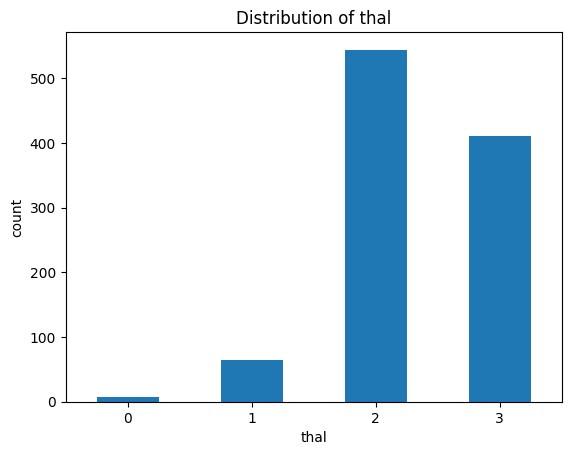

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

Correlation Analysis

Correlation matrix of whole dataset

In [ ]:

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


Correlation Heatmap plot of whole dataset

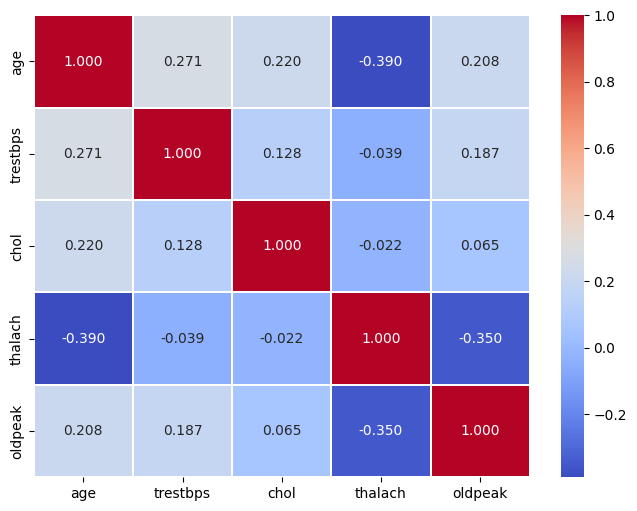

In [ ]:

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()


Check imbalance in the data

In [ ]:
#check Imbalance in data

#group instances based on the classes in OUTCOME variable
class_counts=df.groupby("target").size()

columns=['target','count','percentage']
outcome=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/len(df))*100 # Changed 105000 to len(df) for dynamic total
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,target,count,percentage
0,0,499,48.682927
1,1,526,51.317073



Barplot of heart dieseases vs Percentage

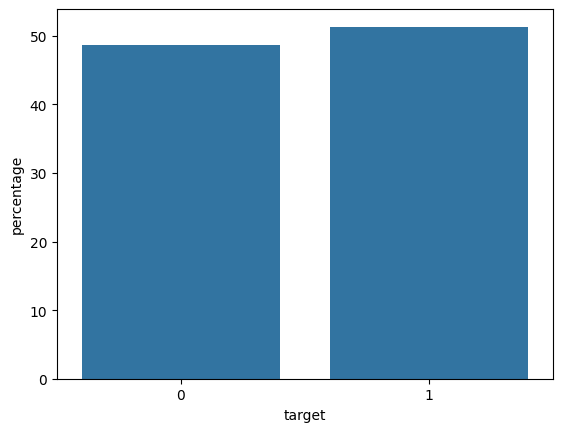

In [ ]:

sns.barplot(data=imbalance_df,x=imbalance_df['target'],y=imbalance_df['percentage'])
plt.show()

Density plots of numerical features

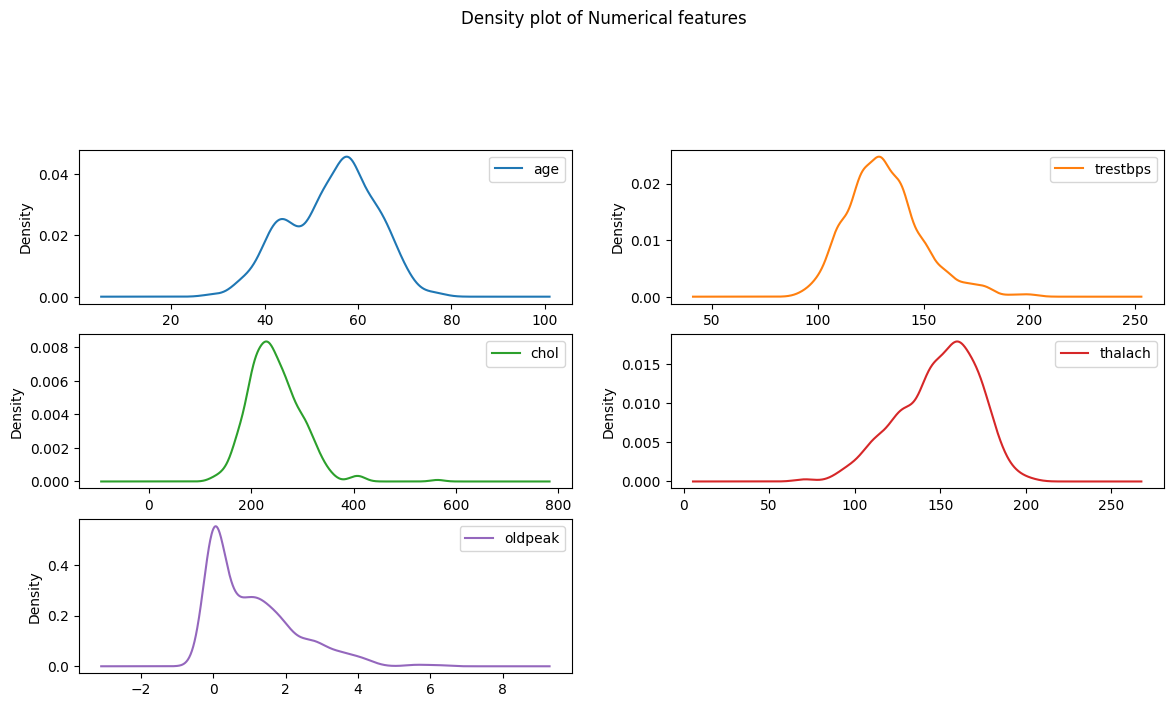

In [ ]:

numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()


Data Preprocessing

In [ ]:
# Drop rows with missing target
df.dropna(subset=['target'], inplace=True)

In [ ]:
# Drop rows with missing target
df.dropna(subset=['target'], inplace=True)

# Feature engineering
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle_Aged'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)

In [ ]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Senior
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Senior
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Senior
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Senior
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Middle_Aged
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Senior


In [ ]:
#Numerical Features
scaled_num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
unscaled_num_features = [] # No explicitly unscaled numerical features in this dataset

#Categorical Features
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group']

#Target Feature
target = 'target'

In [ ]:
# Pipelines
scaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

unscaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', scaled_num_pipeline, scaled_num_features),
    ('unscaled_num', unscaled_num_pipeline, unscaled_num_features),
    ('cat', cat_pipeline, cat_features)
])

In [ ]:
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Senior
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Senior
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Senior
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Senior
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Senior
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Middle_Aged
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Senior


Train-Test Split

In [ ]:
X = df[scaled_num_features + unscaled_num_features + cat_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 2, max_depth= 10, criterion= 'gini'),
    'KNN': KNeighborsClassifier(weights= 'distance', n_neighbors= 20, metric= 'manhattan'),
    'Random Forest': RandomForestClassifier(min_samples_split= 8, min_samples_leaf= 1, max_depth= 15, criterion= 'entropy'),
    'Neural Network': MLPClassifier(solver= 'sgd', learning_rate= 'adaptive', hidden_layer_sizes= (50, 50), alpha= 0.0001, activation= 'tanh')
}
results = []

for name, model in models.items():
    # Fit and predict
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    model_results = {
    'Model': name,
    'Accuracy': accuracy,
    'Precision': report['weighted avg']['precision'],
    'Recall': report['weighted avg']['recall'],
    'F1-Score': report['weighted avg']['f1-score'],
    'Confusion_Matrix': cm,
    'ROC_Curve': None,
    'AUC': None
    }

    # Handle AUC and ROC curve for models that support predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_processed)[:, 1]  # Probability of class 1
        model_results['AUC'] = roc_auc_score(y_test, y_pred_proba)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        model_results['ROC_Curve'] = (fpr, tpr)

    results.append(model_results)

    # Print current results
    print(f"\n{'='*50}")
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    if model_results['AUC'] is not None:
        print(f"AUC: {model_results['AUC']:.4f}")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{cm}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)


Results for Logistic Regression:
Accuracy: 0.8734
AUC: 0.9463
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.87      0.88      0.88       158

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308

Confusion Matrix:
[[130  20]
 [ 19 139]]

Results for Decision Tree:
Accuracy: 0.9610
AUC: 0.9795
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       150
           1       0.97      0.95      0.96       158

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308

Confusion Matrix:
[[146   4]
 [  8 150]]

Results for KNN:
Accuracy: 0.9903
AUC: 0.9996
              precision    recall  f1-score   support

           0       0.98      1.00      0.9

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_metrics_comparison(results_df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    if 'AUC' in results_df.columns:
        metrics.append('AUC')

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics[:4]):
        results_df.sort_values(by=metric, ascending=False).plot(
            x='Model', y=metric, kind='bar', ax=axes[i], title=metric)

    plt.tight_layout()
    plt.show()

def plot_roc_curves(results_df):
    plt.figure(figsize=(10, 8))
    for _, row in results_df.iterrows():
        if row.get('ROC_Curve') is not None:
            fpr, tpr = row['ROC_Curve']
            plt.plot(fpr, tpr, label=f"{row['Model']} (AUC = {row['AUC']:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

def plot_confusion_matrices(results_df):
    n = len(results_df)
    fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(8, 3*((n+1)//2)))
    axes = axes.flatten()

    for i, row in results_df.iterrows():
        cm = row['Confusion_Matrix']
        ax = axes[i]
        sns.heatmap(cm, annot=False, fmt='d', ax=ax, cmap='Blues')
        ax.set_title(row['Model'], fontsize=10)
        ax.set_xlabel('Predicted', fontsize=8)
        ax.set_ylabel('Actual', fontsize=8)
        ax.set_xticklabels(['0', '1'], fontsize=8)
        ax.set_yticklabels(['0', '1'], fontsize=8)


        ax.text(0.5, 0.5, f'TN\n{cm[0,0]}', ha='center', va='center', fontsize=8, color='pink', fontweight='bold')
        ax.text(1.5, 0.5, f'FP\n{cm[0,1]}', ha='center', va='center', fontsize=8, color='red')
        ax.text(0.5, 1.5, f'FN\n{cm[1,0]}', ha='center', va='center', fontsize=8, color='orange')
        ax.text(1.5, 1.5, f'TP\n{cm[1,1]}', ha='center', va='center', fontsize=8, color='green')

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_precision_recall_comparison(results_df):
    plt.figure(figsize=(10, 8))

    bar_width = 0.2
    x = np.arange(len(results_df))

    plt.bar(x, results_df['Precision'], color='skyblue', width=bar_width, label='Precision')
    plt.bar(x + bar_width, results_df['Recall'], color='salmon', width=bar_width, label='Recall')
    plt.bar(x + 2 * bar_width, results_df['F1-Score'], color='plum', width=bar_width, label='F1-Score')

    plt.xlabel('Model', fontsize=8)
    plt.ylabel('Score', fontsize=8)
    plt.title('Precision, Recall, F1-Score Comparison', fontsize=10)
    plt.xticks(x + 1.5 * bar_width, results_df['Model'], rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.ylim(0, 1.05)
    plt.legend(fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_auc_scores(results_df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y='AUC', data=results_df, palette='viridis', hue='Model', legend=False)

    plt.title('AUC Score Comparison Across Models', fontsize=10)
    plt.xlabel('Model', fontsize=8)
    plt.ylabel('AUC Score', fontsize=8)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.tight_layout()
    plt.show()

def plot_accuracy_comparison(results_df):
    plt.figure(figsize=(10, 8))
    bar_width = 0.35
    r1 = range(len(results_df))
    plt.bar(r1, results_df['Accuracy'], color='skyblue', width=bar_width, label='Accuracy')
    plt.xlabel('Model', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.title('Accuracy Comparison of Models', fontsize=12)
    plt.xticks(r1, results_df['Model'], rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

##**PCA**

In [ ]:
from sklearn.decomposition import PCA
print("PCA imported successfully.")

PCA imported successfully.


## Apply PCA to Training Data




In [ ]:
pca = PCA()
pca.fit(X_train_processed)
print("PCA model initialized and fitted to X_train_processed.")

PCA model initialized and fitted to X_train_processed.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Re-defining feature lists and target (from _231VyWW7jdy)
scaled_num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
unscaled_num_features = []
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group']
target = 'target'

# Re-defining pipelines and preprocessor (from 0V9UhZL47jaM)
scaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
unscaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', scaled_num_pipeline, scaled_num_features),
    ('unscaled_num', unscaled_num_pipeline, unscaled_num_features),
    ('cat', cat_pipeline, cat_features)
])

# Re-executing train-test split and preprocessing (from -mqe0wgz7jNL)
X = df[scaled_num_features + unscaled_num_features + cat_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train_processed = preprocessor.fit_transform(X_train)

# Original PCA code
pca = PCA()
pca.fit(X_train_processed)
print("PCA model initialized and fitted to X_train_processed.")

PCA model initialized and fitted to X_train_processed.


In [ ]:
from sklearn.decomposition import PCA

# Initialize and fit PCA
pca = PCA()
pca.fit(X_train_processed)
print("PCA model initialized and fitted to X_train_processed.")

PCA model initialized and fitted to X_train_processed.


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')

# Load the dataset (from crjZQJbw5OJe)
df = pd.read_csv("/content/drive/MyDrive/CSE437/heart.csv")

# Drop rows with missing target (from GjQ6qAFj7QQE)
df.dropna(subset=['target'], inplace=True)

# Feature engineering for age_group (from tinJgWqv7QIU)
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle_Aged'
    else:
        return 'Senior'
df['age_group'] = df['age'].apply(age_group)

# Re-defining feature lists and target (from _231VyWW7jdy)
scaled_num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
unscaled_num_features = []
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group']
target = 'target'

# Re-defining pipelines and preprocessor (from 0V9UhZL47jaM)
scaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
unscaled_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', scaled_num_pipeline, scaled_num_features),
    ('unscaled_num', unscaled_num_pipeline, unscaled_num_features),
    ('cat', cat_pipeline, cat_features)
])

# Re-executing train-test split and preprocessing (from -mqe0wgz7jNL)
X = df[scaled_num_features + unscaled_num_features + cat_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train_processed = preprocessor.fit_transform(X_train)

# Original PCA code
pca = PCA()
pca.fit(X_train_processed)
print("PCA model initialized and fitted to X_train_processed.")

Mounted at /content/drive
PCA model initialized and fitted to X_train_processed.


## Plot Explained Variance




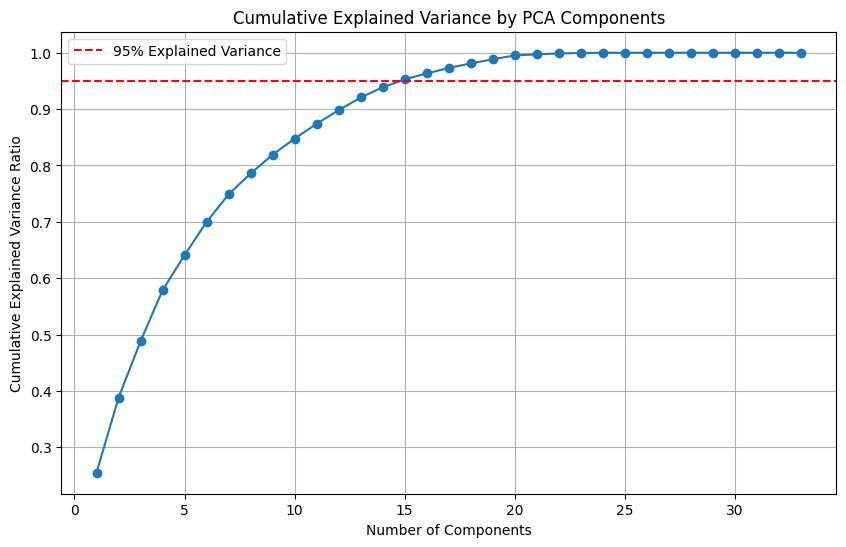

Cumulative explained variance plot generated successfully.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate the cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# 2. Create a new figure and an axes object
plt.figure(figsize=(10, 6))

# 3. Plot the cumulative_variance against the number of components
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')

# 4. Add a horizontal dashed line at y=0.95
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')

# 5. Add labels to the x-axis and y-axis
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# 6. Add a title to the plot
plt.title('Cumulative Explained Variance by PCA Components')

# 7. Add a grid to the plot
plt.grid(True)

# Add legend
plt.legend()

# 8. Display the plot
plt.show()
print("Cumulative explained variance plot generated successfully.")

## Transform Data with PCA



In [ ]:
X_train_pca = pca.transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Shape of X_train_pca: (717, 33)
Shape of X_test_pca: (308, 33)


**Reasoning**:
The `NameError` indicates that `X_test_processed` was not defined. This happened because the cell responsible for preprocessing the test set was not executed. I will re-run the preprocessing for both training and testing data to ensure `X_test_processed` is created before applying PCA.



In [ ]:
X_train_pca = pca.transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Shape of X_train_pca: (717, 33)
Shape of X_test_pca: (308, 33)


##**SVM**

In [ ]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_test_pca)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
cm_svm = confusion_matrix(y_test, y_pred_svm)

model_results_svm = {
    'Model': 'SVM',
    'Accuracy': accuracy_svm,
    'Precision': report_svm['weighted avg']['precision'],
    'Recall': report_svm['weighted avg']['recall'],
    'F1-Score': report_svm['weighted avg']['f1-score'],
    'Confusion_Matrix': cm_svm,
    'ROC_Curve': None,
    'AUC': None
}

if hasattr(svm_model, "predict_proba"):
    y_pred_proba_svm = svm_model.predict_proba(X_test_pca)[:, 1]
    model_results_svm['AUC'] = roc_auc_score(y_test, y_pred_proba_svm)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
    model_results_svm['ROC_Curve'] = (fpr_svm, tpr_svm)

results.append(model_results_svm)
results_df = pd.DataFrame(results)

print(f"\n{'='*50}")
print(f"Results for SVM:")
print(f"Accuracy: {accuracy_svm:.4f}")
if model_results_svm['AUC'] is not None:
    print(f"AUC: {model_results_svm['AUC']:.4f}")
print(classification_report(y_test, y_pred_svm))
print(f"Confusion Matrix:\n{cm_svm}")


Results for SVM:
Accuracy: 0.9383
AUC: 0.9799
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       150
           1       0.96      0.92      0.94       158

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308

Confusion Matrix:
[[144   6]
 [ 13 145]]


##**METRICES COMPARISON**

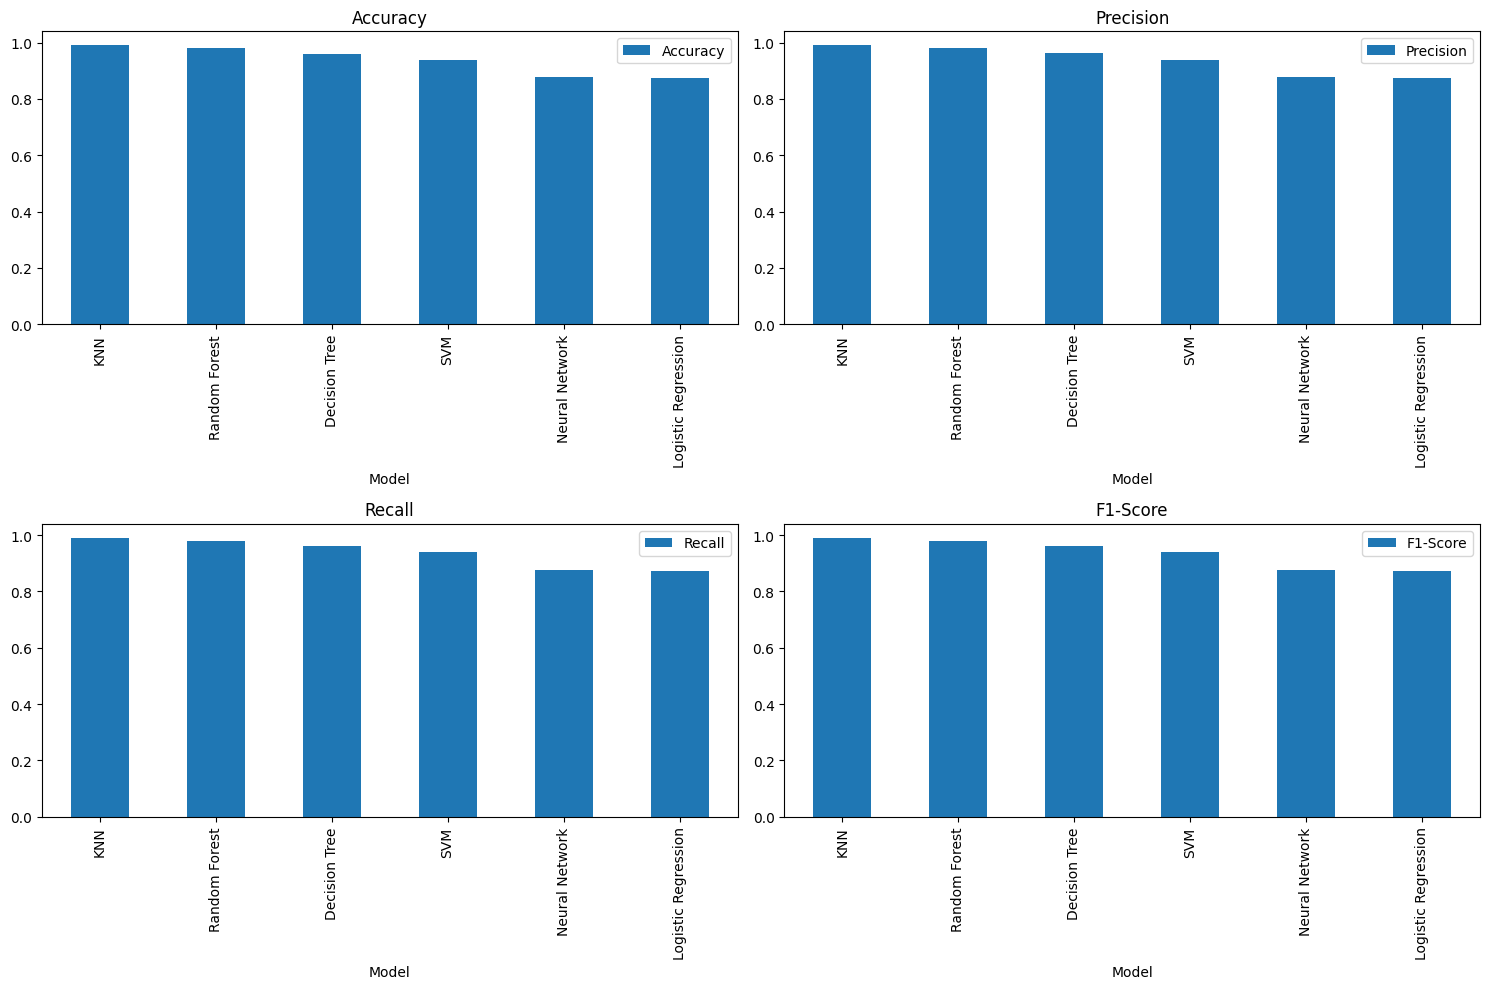

In [ ]:
plot_metrics_comparison(results_df)

##**Plotting ROC Curve**

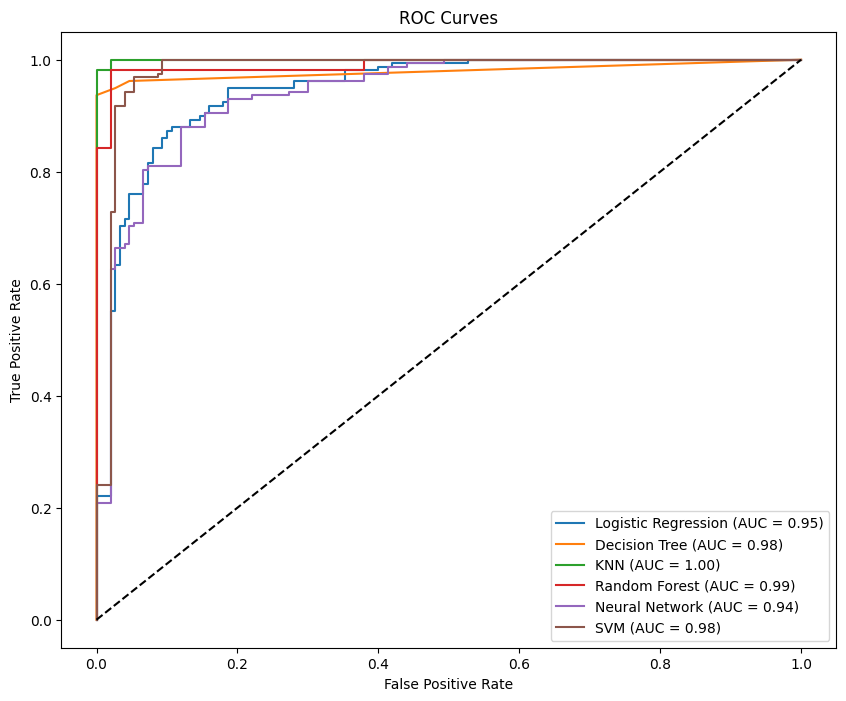

In [ ]:
plot_roc_curves(results_df)

##**Plotting Confusion Metrice**

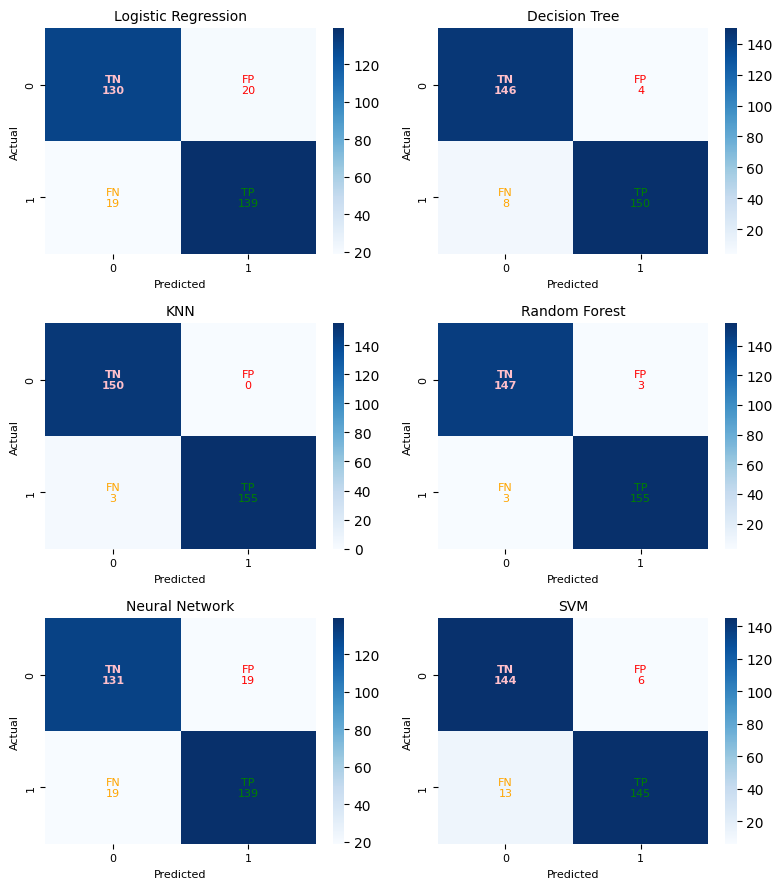

In [ ]:
plot_confusion_matrices(results_df)

##**Ploting Precision Recall**

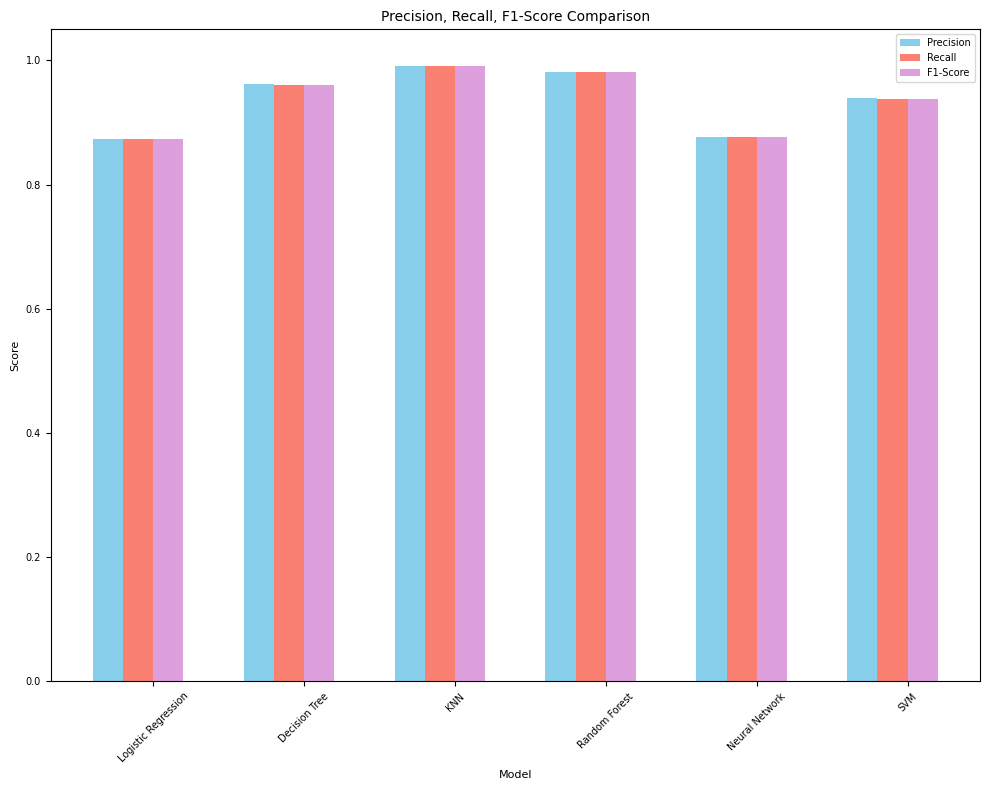

In [ ]:
plot_precision_recall_comparison(results_df)

##**Plotting AUC Scores**

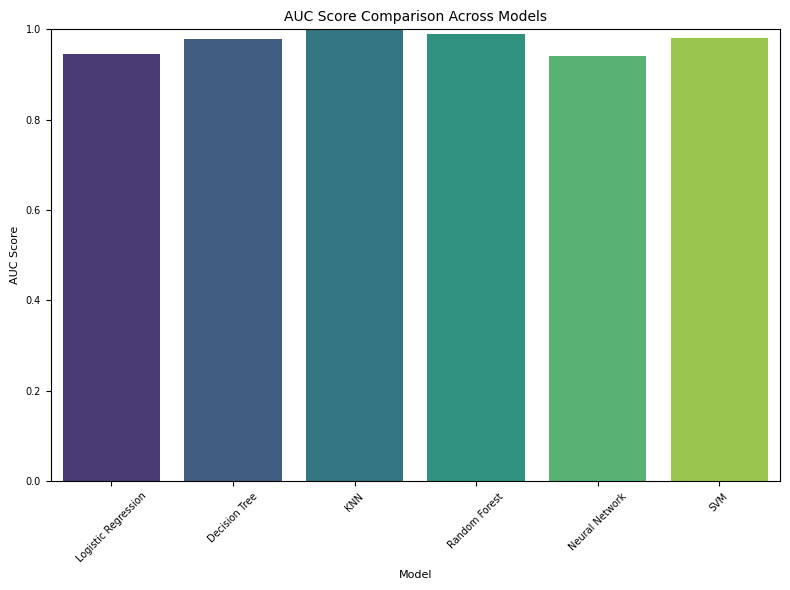

In [ ]:
plot_auc_scores(results_df)

##**Accuracy Comparison**

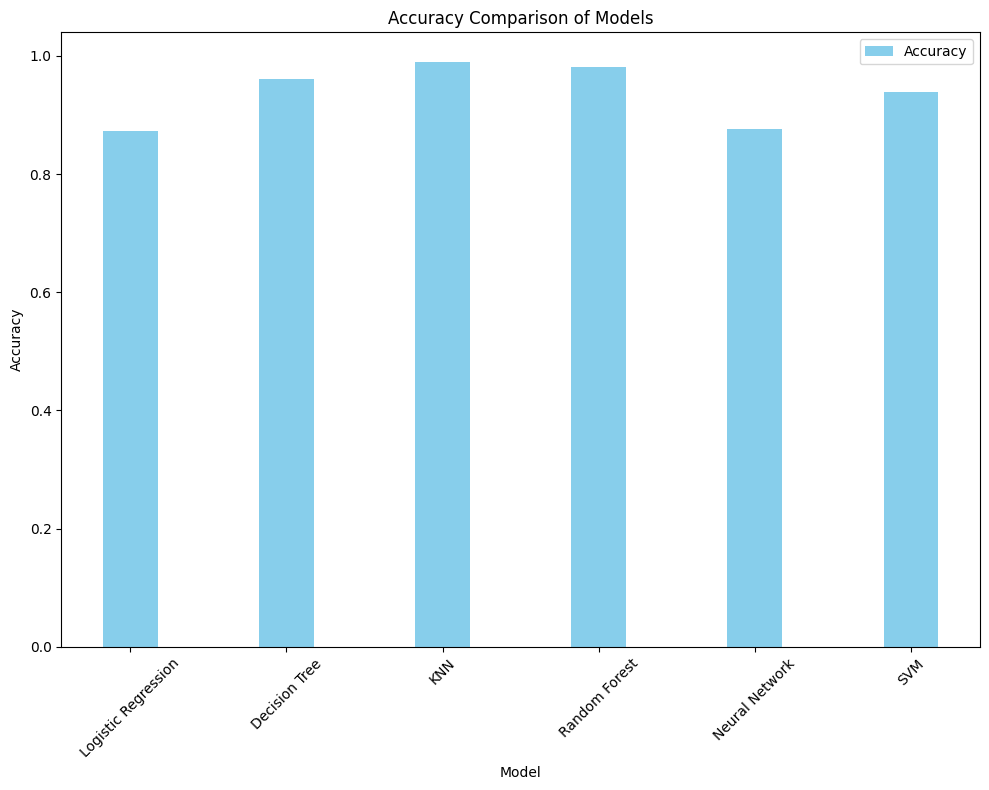

In [ ]:
plot_accuracy_comparison(results_df)

In [ ]:
print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

Shape of X_train_processed: (717, 33)
Shape of X_test_processed: (308, 33)
